In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df = pd.read_csv("housepp_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

### Seperating Numerical and Categorical Data

In [118]:
df2 = df.copy()
df_numerical = df2.select_dtypes(exclude=["object"])
df_categorical = df2.select_dtypes(include=["object"])

In [107]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [119]:
print("Len of Numerical Columns:",len(df_numerical.columns))
print("Len of Numerical Columns",len(df_categorical.columns))
print(len(df_numerical.columns)+len(df_categorical.columns))

Len of Numerical Columns: 38
Len of Numerical Columns 43
81


### Handling Missing Values - Numerical

In [120]:
#Replacing NAN with Median to avoid outliers

for feature in df_numerical.columns:
    median = df_numerical[feature].median()
    df_numerical[feature]=df_numerical[feature].fillna(median)

<ipython-input-120-875475ab4d15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical[feature]=df_numerical[feature].fillna(median)


In [121]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Handling NAN values - Categorical

In [122]:
#Replacing NAN with a new feature "Missing"

for feature in df_categorical.columns:
    df_categorical[feature].fillna("Missing",inplace=True)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [123]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [124]:
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [114]:
for feature in df_categorical.columns:
    print("Feature {} length is {}".format(feature,len(df_categorical[feature].unique())))

Feature MSZoning length is 5
Feature Street length is 2
Feature Alley length is 3
Feature LotShape length is 4
Feature LandContour length is 4
Feature Utilities length is 2
Feature LotConfig length is 5
Feature LandSlope length is 3
Feature Neighborhood length is 25
Feature Condition1 length is 9
Feature Condition2 length is 8
Feature BldgType length is 5
Feature HouseStyle length is 8
Feature RoofStyle length is 6
Feature RoofMatl length is 8
Feature Exterior1st length is 15
Feature Exterior2nd length is 16
Feature MasVnrType length is 5
Feature ExterQual length is 4
Feature ExterCond length is 5
Feature Foundation length is 6
Feature BsmtQual length is 5
Feature BsmtCond length is 5
Feature BsmtExposure length is 5
Feature BsmtFinType1 length is 7
Feature BsmtFinType2 length is 7
Feature Heating length is 6
Feature HeatingQC length is 5
Feature CentralAir length is 2
Feature Electrical length is 6
Feature KitchenQual length is 4
Feature Functional length is 7
Feature FireplaceQu leng

### Converting categorical to numerical values

Using Target Guided Encoding

In [125]:
df_categorical["SalePrice"] = df2["SalePrice"].copy()
for cat in df_categorical.columns:
    ord_label = df_categorical.groupby([cat])['SalePrice'].median().sort_values().index
    ordinal = {k:i for i,k in enumerate(ord_label,0)}
    df_categorical[cat] = df_categorical[cat].map(ordinal)

<ipython-input-125-fe7c896bb4e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["SalePrice"] = df2["SalePrice"].copy()
<ipython-input-125-fe7c896bb4e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[cat] = df_categorical[cat].map(ordinal)


In [126]:
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3,1,1,0,1,1,0,0,16,3,...,2,4,5,2,0,4,2,5,4,412
1,3,1,1,0,1,1,2,0,19,1,...,2,4,5,2,0,4,2,5,4,339
2,3,1,1,1,1,1,0,0,16,3,...,2,4,5,2,0,4,2,5,4,442
3,3,1,1,1,1,1,1,0,18,3,...,1,4,5,2,0,4,2,5,1,194
4,3,1,1,1,1,1,2,0,23,3,...,2,4,5,2,0,4,2,5,4,494


### Scaling down Numerical Values:
If Data is Skewed we will use Logarithmic Transformation

C:\Users\ACER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


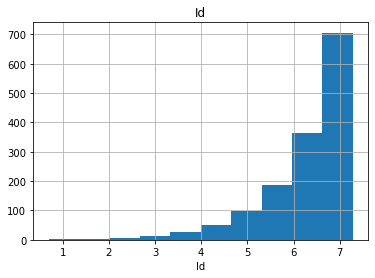

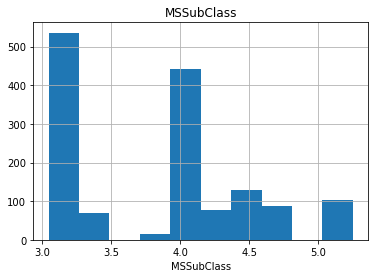

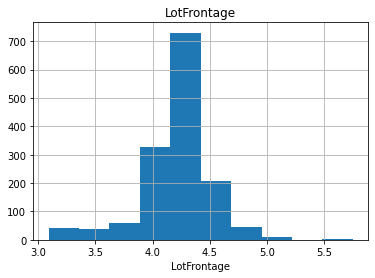

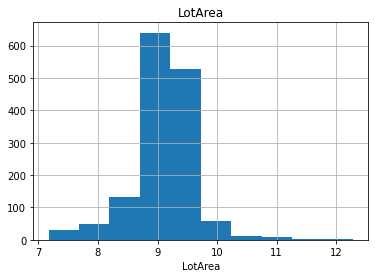

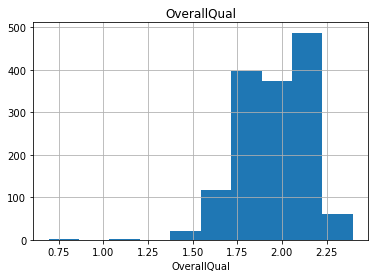

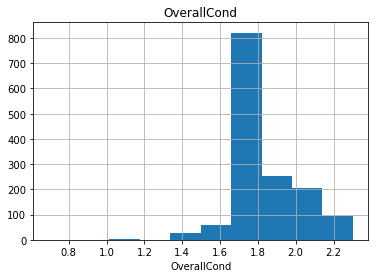

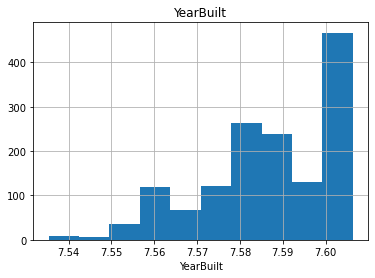

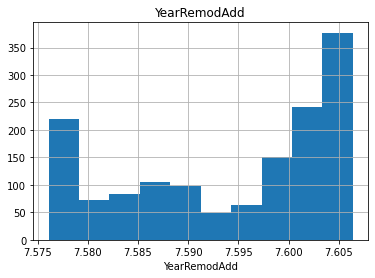

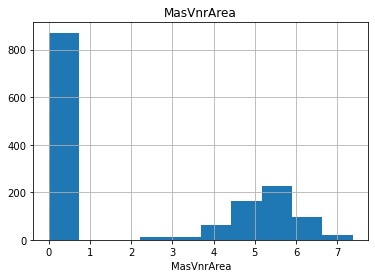

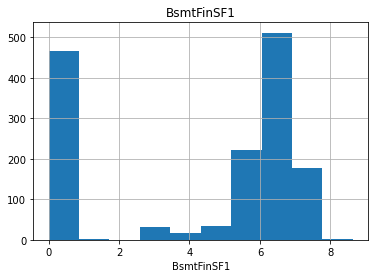

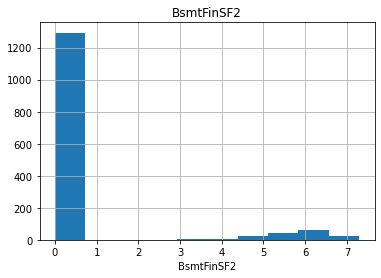

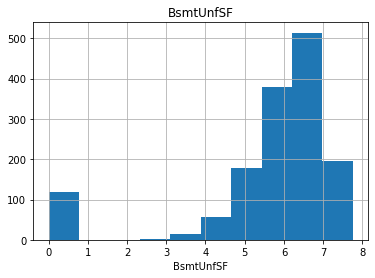

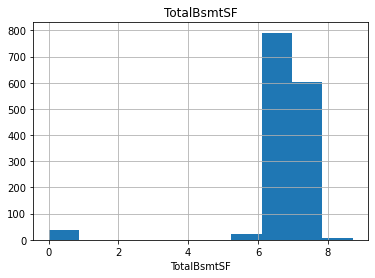

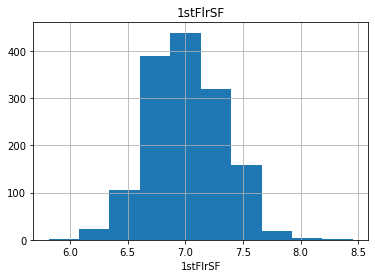

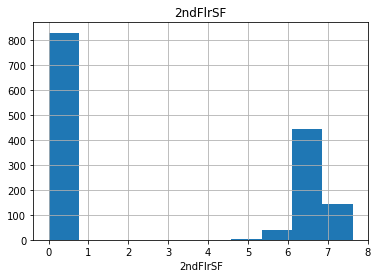

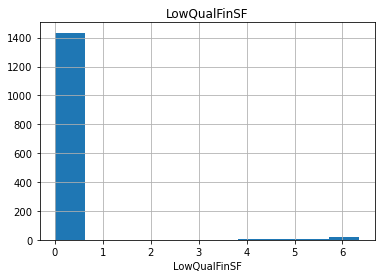

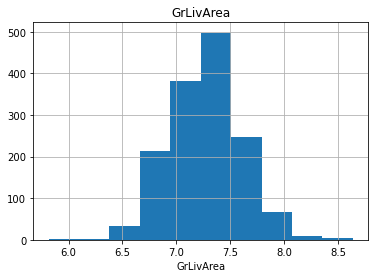

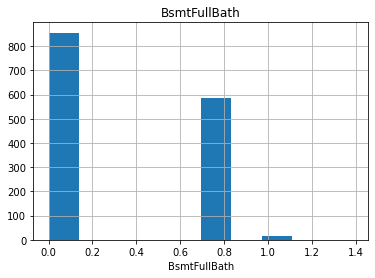

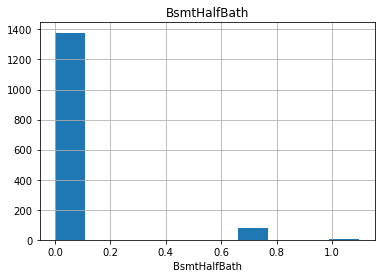

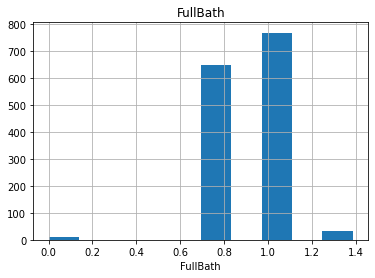

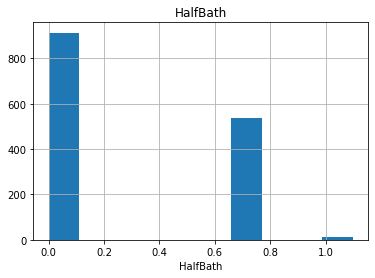

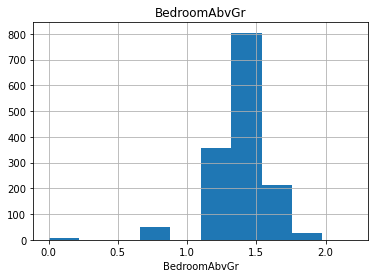

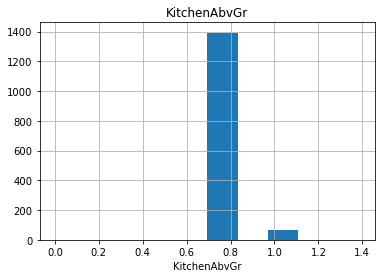

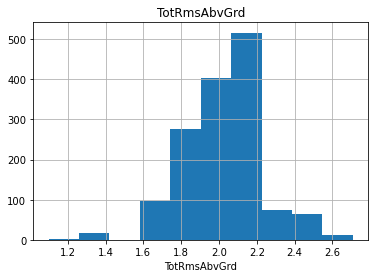

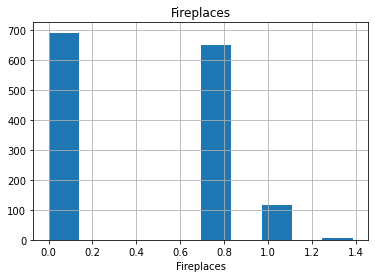

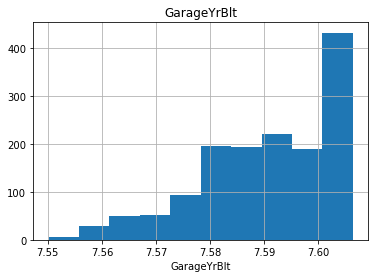

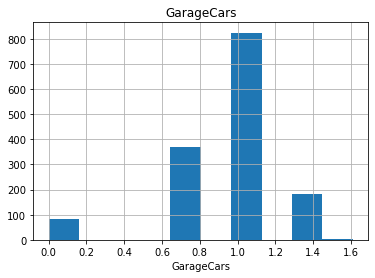

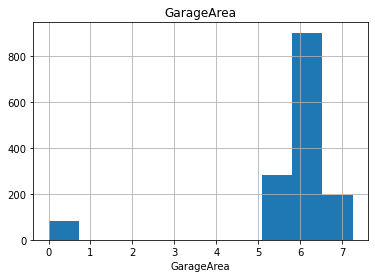

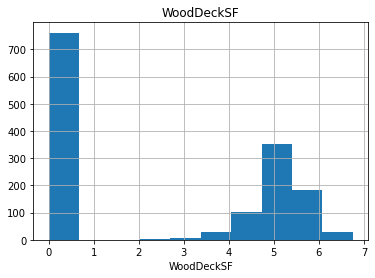

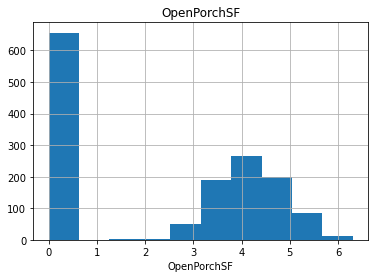

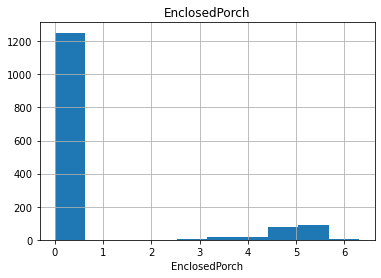

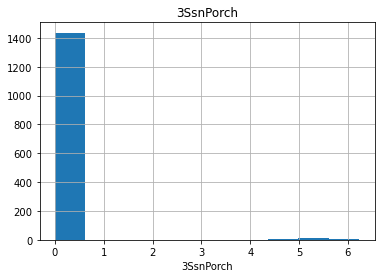

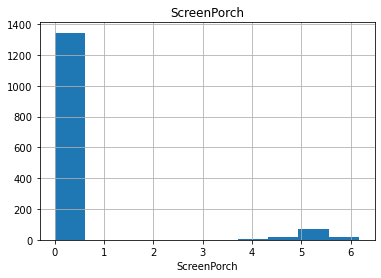

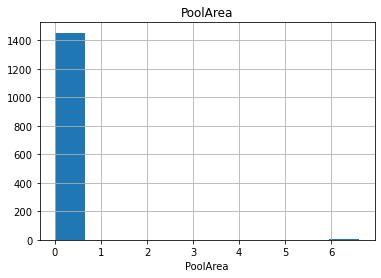

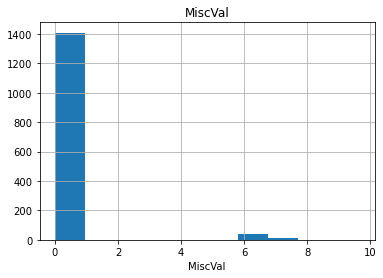

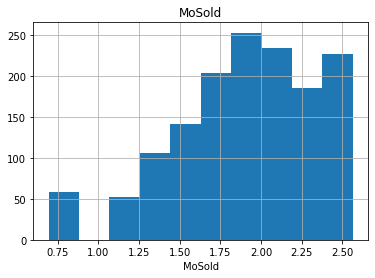

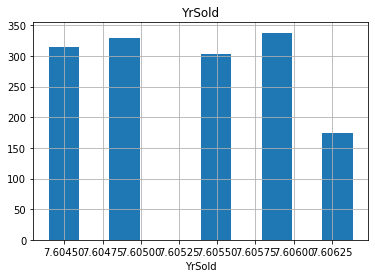

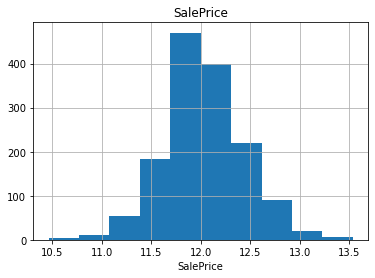

In [97]:
for f in df_numerical.columns:
    df_numerical.hist(f)
    plt.xlabel(f)

Observation : Majority of the data is Skewed, so use logarithmic transformation

In [127]:
for f in df_numerical.columns:
    if df_numerical[f].any() == 0:
        pass
    else:
        df_numerical[f] = np.log1p(df_numerical[f])

<ipython-input-127-fb85746a9b48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical[f] = np.log1p(df_numerical[f])


In [140]:
df_numerical.drop(["SalePrice","Id"],axis=1,inplace=True)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,7.605392
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,1.791759,7.604894
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,2.302585,7.605392
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,1.098612,7.604396
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,2.564949,7.605392


In [142]:
dataset = pd.concat([df_numerical,df_categorical],axis=1)

In [143]:
dataset.shape

(1460, 80)

In [146]:
dataset["SalePrice"] = df["SalePrice"].copy()

In [148]:
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,2,4,5,2,0,4,2,5,4,208500
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,2,4,5,2,0,4,2,5,4,181500
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,2,4,5,2,0,4,2,5,4,223500
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,1,4,5,2,0,4,2,5,1,140000
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,2,4,5,2,0,4,2,5,4,250000


### Train Test Split

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(["SalePrice"],axis=1),
                                 dataset["SalePrice"],
                                 test_size=0.3,
                                 random_state=0)

### Feature Selection

This is a regression problem as SalePrice which is dependent variable has continuous values

Therefore using Mutual Info gain for regression with SelectPercentile


In [157]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

In [158]:
select = SelectPercentile(mutual_info_regression,percentile=20)
select.fit(X_train,y_train)
X_train.columns[select.get_support()]

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'GarageFinish'],
      dtype='object')

Observation: Using the above top 20 percentile values which affect the SalePRice i.e Dependent variable the most